In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=8000) #前8000个单词(每局评论至多包含8000个单词)

17465344/17464789 [==============================] - 3s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
print('shape of train data is ',train_data.shape)
print('shape of train labels is ',train_labels.shape)
print('an example of train data is ',train_data[5])

shape of train data is  (25000,)
shape of train labels is  (25000,)
an example of train data is  [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


In [3]:
import numpy as np
# 神经网络的输入必须是tensor而不是list，所以需要将数据集处理为25000*8000
def vectorize_sequences(sequences,dimension=8000):
    # 生成25000*8000的二维Numpy数组
    results = np.zeros((len(sequences),dimension))
    # one-hot编码
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16,activation='relu',input_shape=(8000,)))
    model.add(layers.Dense(16,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',# 还可以通过optimizer = optimizers.RMSprop(lr=0.001)来为优化器指定参数
                  loss='binary_crossentropy', # 等价于loss = losses.binary_crossentropy
                  metrics=['accuracy']) # 等价于metrics = [metircs.binary_accuracy]
    return model
model = build_model()

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, # 在全数据集上迭代20次
                    batch_size=512, # 每个batch的大小为512
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5986 - accuracy: 0.6926 - val_loss: 0.3987 - val_accuracy: 0.8643
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3339 - accuracy: 0.8990 - val_loss: 0.3330 - val_accuracy: 0.8699
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2435 - accuracy: 0.9229 - val_loss: 0.2892 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1951 - accuracy: 0.9346 - val_loss: 0.2774 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1613 - accuracy: 0.9487 - val_loss: 0.2790 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1343 - accuracy: 0.9587 - val_loss: 0.2872 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1158 - accuracy: 0.9649 - val_loss: 0.3046 - val_accuracy: 0.8849
Epoch 8/20
30

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

NameError: name 'dict_keys' is not defined

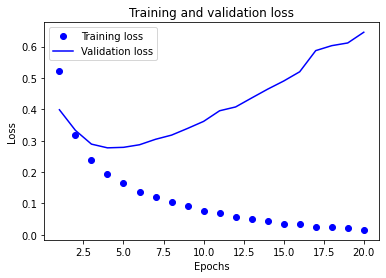

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [14]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>